#

## Medias Moviles

$$ y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1}+ \ldots +\theta_q\epsilon_{t-q}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./Datos/Index2018.csv")
df["date"]=pd.to_datetime(df["date"],format="%d/%m/%Y")
df.set_index("date",inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [5]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
df1=df[["nikkei"]]

In [9]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2

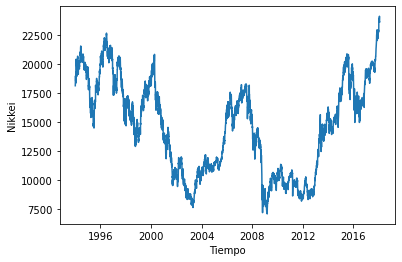

In [11]:
fig, ax = plt.subplots()
ax.plot(df1["nikkei"])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Nikkei')
plt.show();

In [12]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(df1.nikkei)

(-1.332381058320325,
 0.6142308566436258,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83856.80978763242)

In [16]:
primera_diferencia=np.diff(df.nikkei,n=1)

In [17]:
adfuller(primera_diferencia)

(-83.45520517840112,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83844.26621588689)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

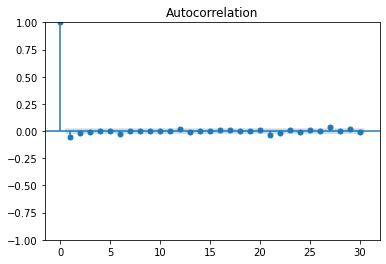

In [20]:
plot_acf(primera_diferencia,lags=30);

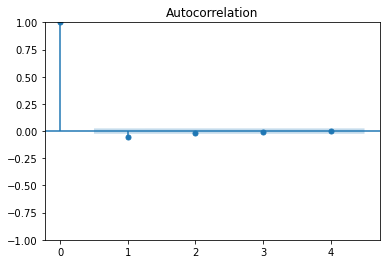

In [21]:
plot_acf(primera_diferencia,lags=4);

Hemos encontrado que es un Ma de tipo con q=1

In [23]:
df_diferencia=pd.DataFrame({'primera_diferencia':primera_diferencia})

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

> Estudiar el sMAPE que el simetrico de media absoluta porcentual


In [30]:
df_diferencia.isnull().sum()

primera_diferencia    0
dtype: int64

In [32]:
Train=df_diferencia[:int(0.9*len(df_diferencia))]
Test=df_diferencia[int(0.9*len(df_diferencia)):]

In [ ]:
Train

In [35]:
Modelo=SARIMAX(Train[Train.columns[0]], order=(0,0,1))

In [39]:
resultado=Modelo.fit()

In [40]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     primera_diferencia   No. Observations:                 5648
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -37900.287
Date:                Fri, 13 Oct 2023   AIC                          75804.575
Time:                        19:21:33   BIC                          75817.853
Sample:                             0   HQIC                         75809.200
                               - 5648                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0453      0.010     -4.529      0.000      -0.065      -0.026
sigma2      3.944e+04    428.295     92.083      0.000    3.86e+04    4.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3848.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
predicciones=resultado.get_prediction(1,5)

In [61]:
predicciones.predicted_mean

1   -14.448606
2    -2.549932
3   -14.104351
4     9.179101
5   -17.552751
Name: predicted_mean, dtype: float64

In [48]:
Test.iloc[:10]

,primera_diferencia
5648,86.99
5649,-390.23
5650,68.31
5651,-433.39
5652,1343.43
5653,-470.89
5654,-35.40
5655,-298.52
5656,60.78
5657,145.12


In [53]:
len(Test)

628

In [54]:
len(predicciones.predicted_mean)

629

In [62]:
mean_absolute_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

475.0169753356243

In [63]:
mean_squared_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

443103.8416644527

In [64]:
mean_absolute_percentage_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

1.0800563258883529

## ARMA

$$y_t + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots+ \phi_p y_{t-p}= \mu + \epsilon_1 +\ldots $$

In [66]:
df2=df["spx"]

In [68]:
adfuller(df2)

(1.1194986381728418,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [69]:
df2_log=np.log1p(df2)

In [70]:
adfuller(df2_log)

(-1.0801785944777602,
 0.7229113822087082,
 18,
 6258,
 {'1%': -3.431395379411139,
  '5%': -2.8620019651000943,
  '10%': -2.567015901065109},
 -38258.89825267011)

In [72]:
df2_diff=np.diff(df2,n=1)

In [73]:
adfuller(df2_diff)

(-14.168367374279823,
 2.0235432823634977e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 50249.23811598101)

* ACF -->  saber los lag de retraso del MA y 
* PACF --> saber los lag de retraso del AR

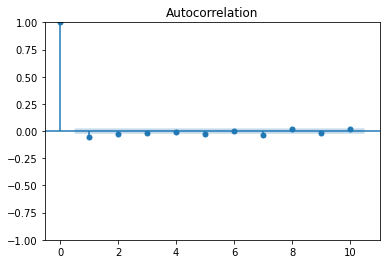

In [76]:
plot_acf(df2_diff,lags=10);

c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


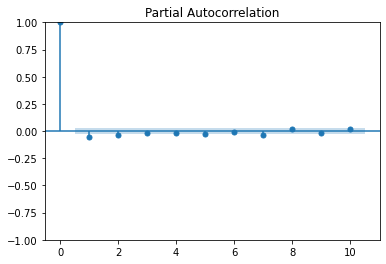

In [77]:
plot_pacf(df2_diff,lags=10);

Se detecta que el candidato es un ARMA(1,1)

In [79]:
Modelo_11=SARIMAX(df2_diff,order=(1,0,1))
resultado_11=Modelo_11.fit()

In [80]:
resultado_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6276
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -25249.679
Date:                Fri, 13 Oct 2023   AIC                          50505.357
Time:                        19:43:55   BIC                          50525.591
Sample:                             0   HQIC                         50512.368
                               - 6276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6389      0.062     10.334      0.000       0.518       0.760
ma.L1         -0.6951      0.057    -12.204      0.000      -0.807      -0.583
sigma2       182.8285      1.741    105.000      0.000     179.416     186.241
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              7041.28
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$ y_t=0.6389*y_{t-1}-0.6951\epsilon_{t-1}+\epsilon_t + 182.8285$$

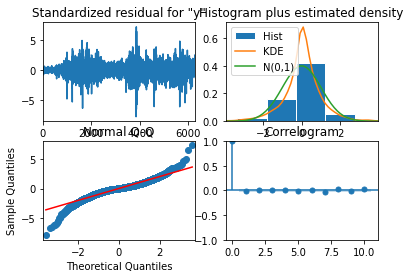

In [82]:
resultado_11.plot_diagnostics();

In [85]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [86]:
residuos=resultado_11.resid

In [87]:
residuos

array([  5.37      ,  -0.85801367,   0.17346775, ...,   2.94558764,
        34.57040778, -16.78596732])

$$ H_0: \text{Los residuos son independientes e incorrelados}$$
$$ H_1: \text{Los residuos son dependientes y correlados}

In [88]:
acorr_ljungbox(residuos)

,lb_stat,lb_pvalue
1,0.121933,0.726947
2,0.204947,0.902602
3,0.367869,0.946797
4,0.395484,0.982845
5,2.280429,0.809137
6,2.282678,0.891953
7,7.398956,0.388555
8,10.612016,0.224666
9,12.224083,0.200969
10,15.771769,0.106355


In [89]:
from statsmodels.graphics.gofplots import qqplot

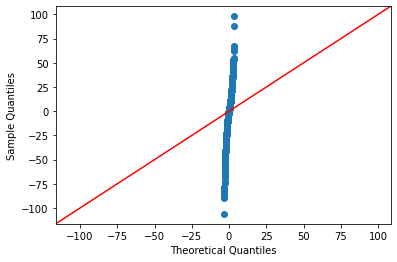

In [95]:
qqplot(residuos,line="45");

 ARIMA(p,d,q)
 * p para el orden parte autorregresiva
 * d para el orden parte integracion
 * q para el orden parte mediamovles

In [103]:
Modelo_111=SARIMAX(df["dax"],order=(0,1,0))
resultado_111=Modelo_111.fit()
resultado_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    dax   No. Observations:                 6277
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -36715.311
Date:                Fri, 13 Oct 2023   AIC                          73432.622
Time:                        20:27:37   BIC                          73439.367
Sample:                    01-07-1994   HQIC                         73434.959
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7059.9284     71.885     98.212      0.000    6919.037    7200.820
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              4606.80
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
dfco2=pd.read_csv("./Datos/co2_mm_mlo.csv")

In [105]:
dfco2.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [112]:
Modelo_213=SARIMAX(dfco2["interpolated"],order=(0,100,0))
resultado_333=Modelo_213.fit(disp=False)
resultado_333.summary()

c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           interpolated   No. Observations:                  729
Model:             SARIMAX(0, 100, 0)   Log Likelihood                     nan
Date:                Fri, 13 Oct 2023   AIC                                nan
Time:                        20:38:44   BIC                                nan
Sample:                             0   HQIC                               nan
                                - 729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.775e+57         -0       -inf      0.000    2.77e+57    2.77e+57
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):               207.00
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Sarima 
Estancionalidad

$Sarima(p,d,q)(P,D,Q)_m$

$Sarima(1,1,1)(0,0,0) \to Arima(1,1,1)$

In [113]:
from statsmodels.tsa.seasonal import STL

In [115]:
descomposicion=STL(dfco2["interpolated"],period=12).fit()

In [116]:
descomposicion

In [117]:
descomposicion.observed

0      315.71
1      317.45
2      317.50
3      317.10
4      315.86
        ...  
724    408.71
725    406.99
726    405.51
727    406.00
728    408.02
Name: interpolated, Length: 729, dtype: float64

In [118]:
descomposicion.trend

0      315.082105
1      315.136268
2      315.190119
3      315.243605
4      315.296728
          ...    
724    408.594251
725    408.773279
726    408.953715
727    409.135722
728    409.319385
Name: trend, Length: 729, dtype: float64

In [119]:
descomposicion.seasonal

0      0.705799
1      2.168677
2      2.407538
3      2.079405
4      0.596657
         ...   
724    0.191529
725   -1.799680
726   -3.502583
727   -3.279958
728   -1.545549
Name: season, Length: 729, dtype: float64

In [120]:
descomposicion.resid

0     -0.077904
1      0.145054
2     -0.097657
3     -0.223010
4     -0.033385
         ...   
724   -0.075780
725    0.016401
726    0.058868
727    0.144236
728    0.246165
Name: resid, Length: 729, dtype: float64

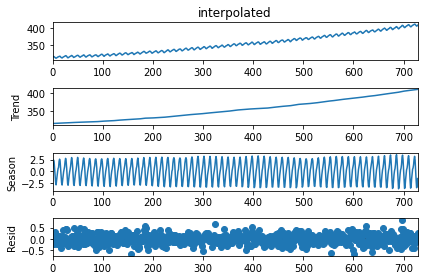

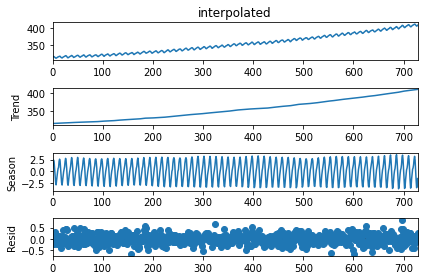

In [122]:
descomposicion.plot();

In [123]:
MOdelo_SARIMAX=SARIMAX(dfco2["interpolated"],order=(1,1,1),seasonal_order=(2,2,2,12)).fit()

c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Daniel Montes\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [124]:
MOdelo_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            interpolated   No. Observations:                  729
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -218.422
Date:                                 Fri, 13 Oct 2023   AIC                            450.844
Time:                                         20:50:03   BIC                            482.741
Sample:                                              0   HQIC                           463.171
                                                 - 729                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1938      0.084      2.298      0.022       0.028       0.359
ma.L1         -0.5792      0.070     -8.293      0.000      -0.716      -0.442
ar.S.L12       0.0309      0.045      0.683      0.495      -0.058       0.120
ar.S.L24      -0.0078      0.041     -0.190      0.849      -0.088       0.072
ma.S.L12      -1.9161      0.035    -55.014      0.000      -1.984      -1.848
ma.S.L24       0.9221      0.036     25.661      0.000       0.852       0.993
sigma2         0.0937      0.005     19.587      0.000       0.084       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.70
Prob(Q):                              0.84   Prob(JB):                         0.10
Heteroskedasticity (H):               1.17   Skew:                            -0.01
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
MOdelo_SARIMAX1=SARIMAX(dfco2["interpolated"],order=(0,1,1),seasonal_order=(1,0,1,12)).fit()
MOdelo_SARIMAX1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.446
Date:                            Fri, 13 Oct 2023   AIC                            426.891
Time:                                    20:51:49   BIC                            445.253
Sample:                                         0   HQIC                           433.976
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.034    -11.073      0.000      -0.437      -0.306
ar.S.L12       0.9997      0.000   3152.949      0.000       0.999       1.000
ma.S.L12      -0.8651      0.021    -40.396      0.000      -0.907      -0.823
sigma2         0.0963      0.005     20.560      0.000       0.087       0.106
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.73
Prob(Q):                              0.72   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
Train=dfco2["interpolated"].iloc[:718]
Test=dfco2["interpolated"].iloc[718:]

In [127]:
MOdelo_entrenar=SARIMAX(Train,order=(0,1,1),seasonal_order=(1,0,1,12)).fit()
MOdelo_entrenar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  718
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.162
Date:                            Fri, 13 Oct 2023   AIC                            418.324
Time:                                    20:54:13   BIC                            436.624
Sample:                                         0   HQIC                           425.390
                                            - 718                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.034    -11.021      0.000      -0.438      -0.305
ar.S.L12       0.9997      0.000   3221.839      0.000       0.999       1.000
ma.S.L12      -0.8646      0.023    -37.782      0.000      -0.909      -0.820
sigma2         0.0960      0.005     20.416      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.84
Prob(Q):                              0.71   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
predicciones=MOdelo_entrenar.predict(start=len(Train),end=len(Train)+len(Test)-1)

In [129]:
predicciones

718    407.928496
719    408.673721
720    409.579218
721    411.138933
722    411.742592
723    410.961063
724    409.269268
725    407.168195
726    405.717804
727    405.989569
728    407.524814
Name: predicted_mean, dtype: float64

In [131]:
Test.head()

718    407.96
719    408.32
720    409.41
721    410.24
722    411.24
Name: interpolated, dtype: float64

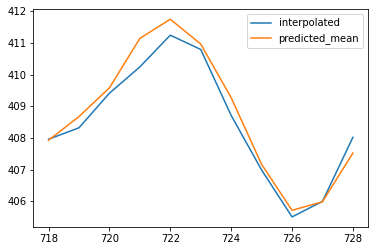

In [134]:
Test.plot(legend=True)
predicciones.plot(legend=True)
plt.show();

In [138]:
Produccion=MOdelo_SARIMAX1.predict(start=len(dfco2),end=len(dfco2)+48)

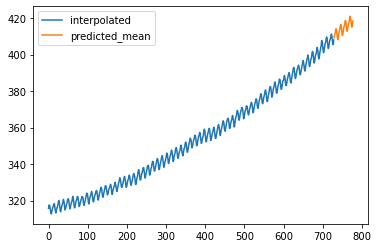

In [139]:
dfco2["interpolated"].plot(legend=True)
Produccion.plot(legend=True)
plt.show();